In [1]:
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
np.random.seed(1)

In [2]:
X, Y = load_planar_dataset()

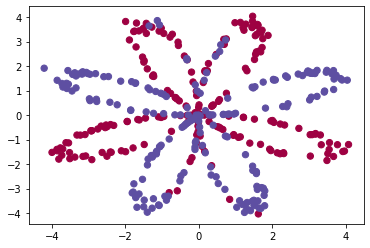

In [3]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [25]:
# type(X)
Y.shape[0]


1

In [9]:
# simple logistic regression model on load_planar_datasets

In [10]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

/home/sachin269/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

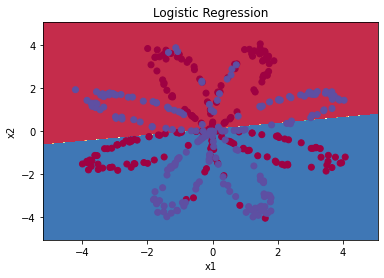

In [11]:
# plot decison boundary
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")
# print accuracy
LR_predictions = clf.predict(X.T)

In [13]:
print(LR_predictions.shape)

(400,)


In [14]:
print(np.dot(Y, LR_predictions))

[102]


In [36]:
print(X.shape[1])

400


In [18]:
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


In [21]:
float(Y.size)*100

40000.0

Interpretation: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now!

In [26]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x,n_h,n_y

In [31]:
X_assess, Y_assess = layer_sizes_test_case()
n_x,n_h,n_y = layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [34]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    parameters = {"W1":W1,
                 "b1":b1,
                 "W2":W2,
                 "b2":b2}
    return parameters

In [35]:
n_x, n_h, n_y = initialize_parameters_test_case()

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


In [38]:
def forward_propagation(X, parameters):
    #x = (2,400)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1,X.shape[1]))
    
    cache ={"Z1":Z1,
           "A1":A1,
           "Z2":Z2,
           "A2":A2}
    return A2,cache
    

In [39]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)

In [41]:
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700113 -1.3076660128732143 0.21287768171914198


In [42]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1]
    logprobs = np.multiply(Y, np.log(A2))+np.multiply((1-Y),np.log(1-A2))
    cost = (-1/m) * np.sum(logprobs)
    cost = float(np.squeeze(cost))
    assert(isinstance(cost, float))
    return cost

In [43]:
A2, Y_assess, parameters = compute_cost_test_case()

print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


In [51]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    dZ2 = A2- Y
    dW2 = (1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = (1/m)*np.dot(dZ1,X.T)
    db1 = (1/m)*np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}
    return grads

In [52]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [53]:
def update_parameters(parameters, grads,learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1":W1,
                 "b1":b1,
                 "W2":W2,
                 "b2":b2}
    return parameters

In [54]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


# whole neural network model

In [59]:
def nn_model(X, Y, n_h,learning_rate, num_iterations = 1000, print_cost =  False):
    n_x = layer_sizes(X,Y)[0]
    n_y = layer_sizes(X,Y)[2]
    parameters = initialize_parameters(n_x,n_h,n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0,1000):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads,learning_rate)
        if print_cost and i%10 == 0:
            print("cost after iterations %i: %f" %(i,cost))
    return parameters

In [60]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

cost after iterations 0: 0.692739
cost after iterations 10: 0.127295
cost after iterations 20: 0.026649
cost after iterations 30: 0.013948
cost after iterations 40: 0.009313
cost after iterations 50: 0.006950
cost after iterations 60: 0.005528
cost after iterations 70: 0.004581
cost after iterations 80: 0.003906
cost after iterations 90: 0.003402
cost after iterations 100: 0.003012
cost after iterations 110: 0.002701
cost after iterations 120: 0.002447
cost after iterations 130: 0.002237
cost after iterations 140: 0.002059
cost after iterations 150: 0.001907
cost after iterations 160: 0.001776
cost after iterations 170: 0.001662
cost after iterations 180: 0.001561
cost after iterations 190: 0.001471
cost after iterations 200: 0.001392
cost after iterations 210: 0.001320
cost after iterations 220: 0.001255
cost after iterations 230: 0.001197
cost after iterations 240: 0.001143
cost after iterations 250: 0.001094
cost after iterations 260: 0.001049
cost after iterations 270: 0.001008
cos

In [61]:
def predict(parameters, X):
    A2, cache = forward_propagation(X,parameters)
    predictions = (A2>0.5)
    return predictions

In [62]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

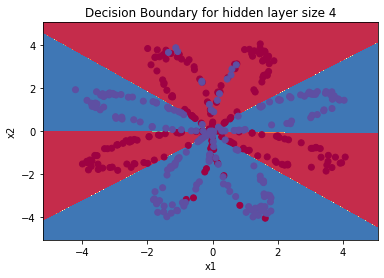

In [64]:
parameters = nn_model(X,Y,4,1.2,num_iterations=10000,print_cost=False)
plot_decision_boundary(lambda x: predict(parameters, x.T),X,Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [65]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 89%


Accuracy for 1 hidden units: 67.75 %
Accuracy for 2 hidden units: 65.25 %
Accuracy for 3 hidden units: 89.5 %
Accuracy for 4 hidden units: 89.25 %
Accuracy for 5 hidden units: 89.5 %
Accuracy for 20 hidden units: 88.0 %
Accuracy for 50 hidden units: 88.0 %


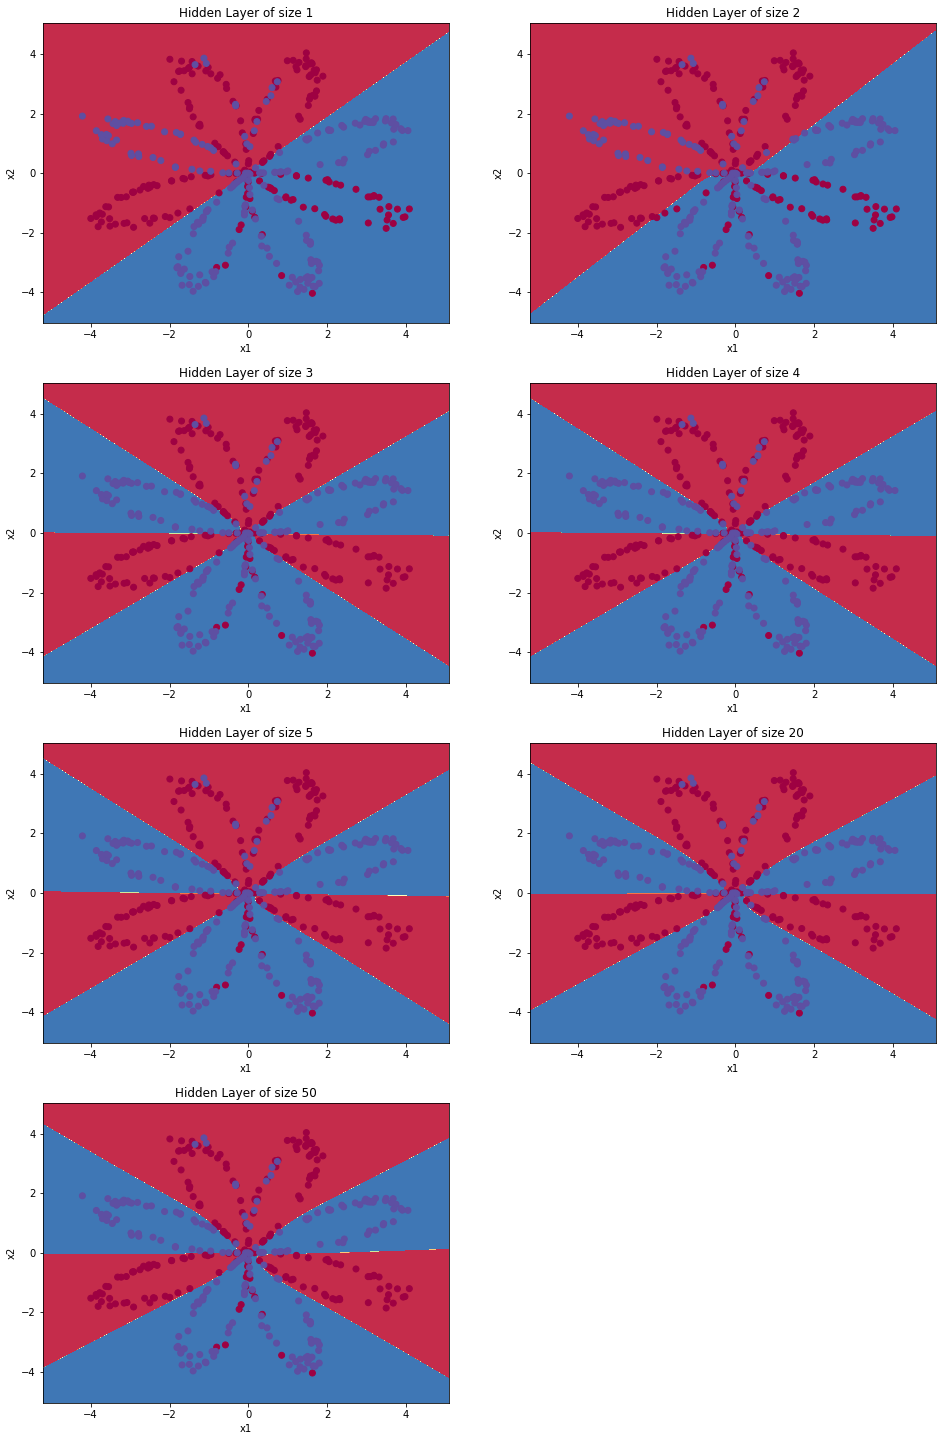

In [66]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))